# DS4023 Machine Learning : Logistic Regression Exercise

## Introduction
In this exercise, you will implement logistic regression and apply it to two diﬀerent datasets. 

### 1. Logistic Regression 
You will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classiﬁcation model that estimates an applicant’s probability of admission based the scores from those two exams.

### 1.1 Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible.

First, let's import necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Second, let's read the data in from the data file.

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


You will now complete the code in below so that it displays a scatter ﬁgure with X and Y axis to be the scores of the students, use color of each point to indicate whether a student is admitted or not.

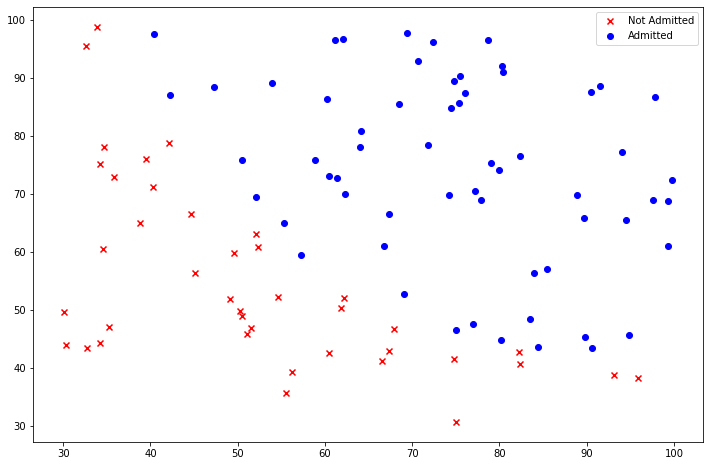

In [3]:
# code here to plot a scatter figure to visualize the data as follows
plt.figure(figsize=(12,8))
Admitted_0 = data[data["Admitted"] == 0]
Admitted_1 = data[data["Admitted"] == 1]
plt.scatter(Admitted_0['Exam 1'], Admitted_0['Exam 2'], marker="x", c="r")
plt.scatter(Admitted_1['Exam 1'], Admitted_1['Exam 2'], marker="o", c="b")
plt.legend(['Not Admitted', 'Admitted'])
plt.show()

Looks like there is a clear boundary between two classes, so let's try to implement a logistic regression classifier to do the job。

### 1.2 Implementation of logistic regression
### 1.2.1 sigmoid 函数
Before you start with the actual cost function, recall that the sigmoid function looks like this:
\\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
the logistic regression hypothesis is deﬁned as： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
Please implement the sigmoid function in below

In [4]:
#code here to implement the sigmoid function
def sigmoid(z):
#     print(z)
    gz = 1/(1+np.exp(-z))
    return gz

Plot the function below to verify if it is correct:

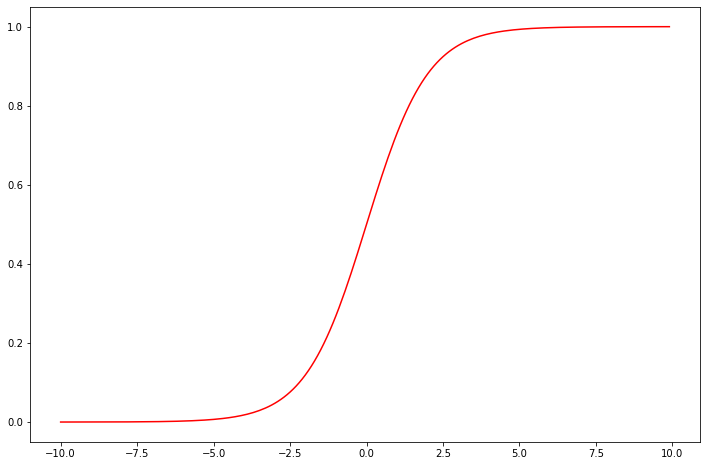

In [5]:
#code here to plot the sigmoid function
plt.figure(figsize=(12,8))
z = np.arange(-10,10,0.1)
gz = sigmoid(z)
plt.plot(z, gz, c='r') 
plt.show()

### 1.2.2 Cost function and gradient
Now you will implement the cost function and gradient for logistic regression.：
\\[J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}\\]

In [6]:
#code here to implement the above cost function
def cost(theta, X, y):
    ''' cost function for you to minimize'''
#     print(theta)
    hx = sigmoid(np.matmul(np.matrix(X), np.transpose(theta)))
    cost1 = 1/len(hx)*(np.dot(np.matrix(np.transpose(-y)), np.log(hx+np.exp(-8)))[0,0] - np.dot(np.matrix(np.transpose(1-y)), np.log(1-hx+np.exp(-8)))[0,0])
#     print(cost1)
    return cost1

Data initialization, Similar to what you did in linear regress exercise:

In [7]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)

X = np.array(data.loc[:, ['Ones', 'Exam 1', 'Exam 2']])
y = np.array(data.loc[:, ['Admitted']])
#initialize theta with 0s

theta = np.matrix(np.array([0,0,0]))

Check if the dimensions of data are correct

In [8]:
theta

matrix([[0, 0, 0]])

In [9]:
X.shape, theta.shape, y.shape

((100, 3), (1, 3), (100, 1))

Calculate the initial cost function value:

In [10]:
cost(theta, X, y)

0.69247648027387

### gradient descent(梯度下降)
* we are going to use batch gradient descent）  
* implement the gradient function of each parameter using vector calculations： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [11]:
#code here to implement the above gradient function
def gradient(theta, X, y):
    iters = 100
    alpha = 0.01
    theta_lst = theta.tolist()[0]

    for i in range(iters):
        hx = sigmoid(np.matmul(X, np.transpose(-theta)))
        for i in range(theta.shape[1]):
#             print((np.dot(np.transpose(hx-y), X[:,i])))
            theta_lst[i] = theta_lst[i]-(alpha/len(hx))*(np.dot(np.transpose(hx-y), X[:,i]))[0,0]
    theta = np.array(theta_lst)
    return theta

Note that up to now we have just implemented the gradient at each step, we haven't done the gradient descent to find the minimal cost function.
We will do it using some optimization functions in the Scipy optimize library.

Show the gradient value under the initial theta value:

In [12]:
gradient(theta, X, y)

array([ 0.1       , 12.00921659, 11.26284221])

Now we can use several different optimization functions in the Scipy optimize library to find the best theta:

- [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)


In [13]:
import scipy.optimize as opt

In [14]:
# change the form to fit the opt.minimize form
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1])
theta = np.zeros(X.shape[1])
theta = theta=np.zeros(3) # X(m*n) so theta is n*1
def cost(theta, X, y):
    # your code here  (appro ~ 2 lines)
    result_cost = np.mean(-y * np.log(sigmoid(np.dot(X, theta))) - (1 - y) * np.log(1 - sigmoid(np.dot(X, theta))))
    return result_cost
def gradient(theta, X, y):
    # the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)
    return np.dot(np.transpose(X), (sigmoid(np.dot(X, theta)) - y)) / len(X)

In [15]:
# fill in the correct arguments in the opt.minimize function

result = opt.minimize(cost,theta,args = (X, y),method = 'TNC',jac = gradient)
result

     fun: 0.20349770158947528
     jac: array([9.00474864e-09, 8.63875280e-08, 4.72129797e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131846,   0.20623159,   0.20147148])

Let's check what is the cost value with our optimized result

In [16]:
cost(result.x, X, y)

0.20349770158947528

### 1.3 Predcition and verification with training dataset
After learning the parameters, you can use the model to predict whether a particular student will be admitted. To evaluate the quality of the parameters we have found, we can calculate how well the learned model predicts on our training set 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
Your task is to complete the code in predict funcition so that will produce “1” or “0” predictions given a dataset and a learned parameter vector \theta

When ${{h}_{\theta }}>= 0.5$,  y=1

When ${{h}_{\theta }}< 0.5$，y=0

In [17]:
# complete the code to apply your model for prediction
def predict(theta, X):
    probability = sigmoid(np.dot(X, theta))
    return (probability >= 0.5).astype(int)

Calculate the performance result:

In [18]:
#complete the codes here
from sklearn.metrics import classification_report  # this is a convinient function to show the classification performance

theta_min = result["x"]
y_pred = predict(theta_min, X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



Note that this is the performance on training data only, seems not bad, but the real performance might be worse.

### 1.4 finding and visualizing the decision boundary

To find the decision boundary in this dataset, it means to draw a line in the (exam1 score, exame2 score) plane. To be more specific, we need to find the $X$, so that $X \times \theta_{opt} = 0$

In [19]:
#the optimal theta has been found in section 1.2.3 already, it is theta_min, let's have a look
print(theta_min)

[-25.16131846   0.20623159   0.20147148]


Now let's draw the line that represent the equation $X \times \theta_{opt} = 0$, which is:
$\theta_0+x_1*\theta_1+x_2*\theta_2=0$, so we have the line $x_2 = -(\theta_0/\theta_2+x_1*\theta_1/\theta_2)$

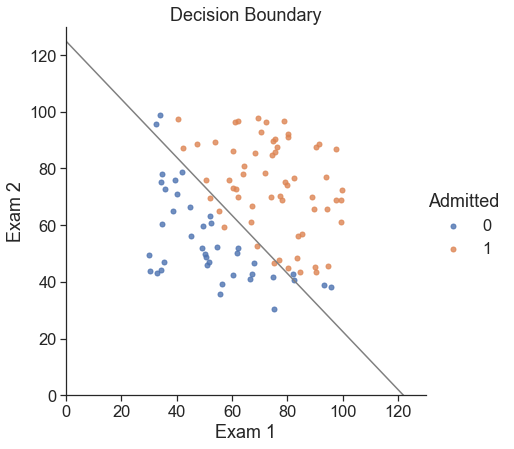

In [20]:
#complete the code below
coef = [theta_min[0]/theta_min[2], theta_min[1]/theta_min[2]]

x1 = np.arange(0, 130, 0.01)
x2 = -(coef[0]+x1*coef[1])

sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('Exam 1', 'Exam 2', hue='Admitted', data=data, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 25}
          )

plt.plot(x1, x2, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Decision Boundary')
plt.show()

### 2.Regularized logistic regression


In this part of the exercise, you will implement regularized logistic regression to predict whether microchips(芯片) from a fabrication plant（晶圆厂、半导体制造厂） passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two diﬀerent tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### 2.1 Visualizing the data

In [21]:
#read the data 

path =  'ex2data2.txt'
data2 = pd.read_csv("./ex2data2.txt", header=None, 
                    names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Similar to the previous parts of this exercise, plotData is used to generate a ﬁgure like below, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with diﬀerent markers.


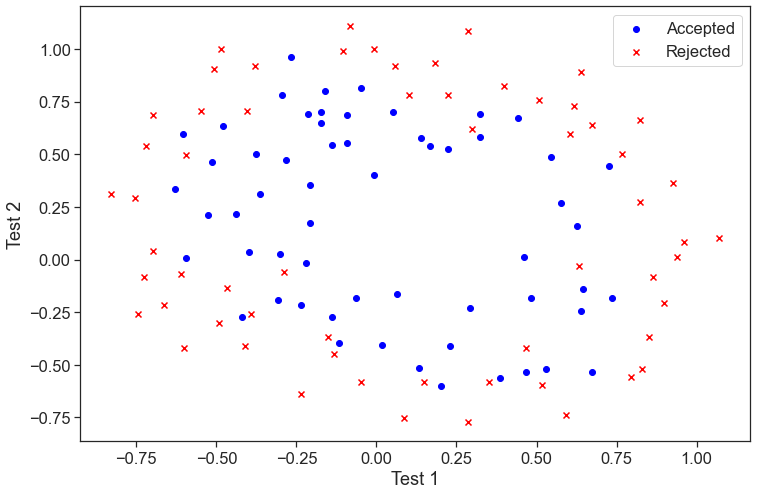

In [22]:
#visualize the data
accepted_data = data2[data2['Accepted'] == 1]
rejected_data = data2[data2['Accepted'] == 0]
plt.figure(figsize=(12, 8))
plt.scatter(accepted_data['Test 1'],accepted_data['Test 2'],color='blue')
plt.scatter(rejected_data['Test 1'],rejected_data['Test 2'],color='red',marker = "x")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(labels=["Accepted","Rejected"])

plt.show()

Figure above shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to ﬁnd a linear decision boundary.


### 2.2 Feature mapping
One way to ﬁt the data better is to create more features from each data point. We will map the features into all polynomial terms of x1 and x2 up to the sixth power.

polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```
<img style="float: left;" src="mapped_feature.png">

In [23]:
def feature_mapping(x, y, power):
#     """return mapped features as ndarray or dataframe"""
    output = []
    col_name = []
    for i in range(power + 1):
        for p in range(i, power + 1):
            col_name.append("f%d%d"%(i,p-i))
            output.append(np.power(x,i) * np.power(y, p-i))
    df = pd.DataFrame(np.transpose(np.array(output)),columns = col_name)
    return df

In [24]:
x1 = np.array(data2['Test 1'])
x2 = np.array(data2['Test 2'])

In [25]:
data = feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f01,f02,f03,f04,f05,f06,f10,f11,f12,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
0,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,0.025089,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,-0.043509,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,-0.102412,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,-0.094573,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,-0.111283,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classiﬁer trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot. While the feature mapping allows us to build a more expressive classiﬁer, it also more susceptible to overﬁtting. In the next parts of the exercise, you will implement regularized logistic regression to ﬁt the data and also see for yourself how regularization can help combat the overﬁtting problem.


### 2.3 regularized cost and  gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression. Recall that the regularized cost function in logistic regression is

$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

Note that you should not regularize the parameter $\theta_0$

In [26]:
theta = np.repeat(0, 28)

X = feature_mapping(x1 ,x2, 6)
print(X.shape)

y = np.array(data2['Accepted'])
print(y.shape)
print(y)

(118, 28)
(118,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [27]:
#complete the code for calculating the regularized cost here
def regularized_cost(theta, X, y, l=1):

    #     '''you don't penalize theta_0'''
    theta_j1_to_n = theta[1:]
    regularized_term = l/(2*X.shape[0])*( theta_j1_to_n @ theta_j1_to_n.T)
    
    return cost(theta, X, y) + regularized_term

Check the initial regularized cost

In [28]:
regularized_cost(theta, X, y, l=1)

0.6931471805599454

Note that you should not regularize the parameter $\theta_0$：
\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

Calculate the gradient:


In [29]:
#complete the code for calculating the regularized gradient here
def regularized_gradient(theta, X, y, reg_lambda=1):
#     '''still, leave theta_0 alone'''
    res = (reg_lambda/len(X)) * theta
    res[0] = 0
    return gradient(theta, X, y) + res

Check the initial regularized gradient vector

In [30]:
regularized_gradient(theta, X, y)

array([8.47457627e-03, 7.77711864e-05, 3.76648474e-02, 2.34764889e-02,
       3.93028171e-02, 3.10079849e-02, 3.87936363e-02, 1.87880932e-02,
       1.15013308e-02, 8.19244468e-03, 3.09593720e-03, 4.47629067e-03,
       1.37646175e-03, 5.03446395e-02, 7.32393391e-03, 1.28600503e-02,
       5.83822078e-03, 7.26504316e-03, 1.83559872e-02, 2.23923907e-03,
       3.38643902e-03, 4.08503006e-04, 3.93486234e-02, 4.32983232e-03,
       6.31570797e-03, 1.99707467e-02, 1.09740238e-03, 3.10312442e-02])

### 2.3 Optimization: similar to what you did without regularization

In [31]:
import scipy.optimize as opt

In [32]:
#code here to implement the optimization
res = opt.minimize(regularized_cost, theta, args = (X, y), method = 'TNC', jac = regularized_gradient)
res

     fun: 0.5290027299645079
     jac: array([-2.15145784e-06, -3.49183743e-07, -9.33805229e-07, -9.72765613e-07,
        2.33038308e-07, -1.48167391e-06, -7.34969019e-07,  6.79278792e-07,
       -4.07685310e-08,  1.53887615e-08,  1.79681828e-07, -5.27937086e-08,
        1.66015705e-08,  8.75871123e-07,  1.70210227e-08, -2.79795893e-07,
       -9.26370936e-08, -4.12213035e-07, -5.14497258e-07,  3.54992894e-08,
        6.16770288e-07, -7.17827653e-08,  6.95568635e-08, -2.12127055e-07,
       -1.31480642e-07,  1.47173953e-07,  1.80353420e-07,  2.31298770e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 32
     nit: 7
  status: 1
 success: True
       x: array([ 1.27271026,  1.18111686, -1.43166928, -0.17516292, -1.19271299,
       -0.45645981, -0.92467488,  0.62529964, -0.91743189, -0.35725404,
       -0.27469165, -0.29539514, -0.14389149, -2.01987399, -0.36553118,
       -0.61558557, -0.27778948, -0.32742404,  0.12393228, -0.05098418,
       -0.04466178,  0.01555759, -1.458170

### 2.4 Prediction: verify on the training data and see how well your model work

In [33]:
#check the results

final_theta = res.x
print(final_theta)
y_pred = predict(final_theta, X)
print(y_pred)
print(classification_report(y, y_pred))

[ 1.27271026  1.18111686 -1.43166928 -0.17516292 -1.19271299 -0.45645981
 -0.92467488  0.62529964 -0.91743189 -0.35725404 -0.27469165 -0.29539514
 -0.14389149 -2.01987399 -0.36553118 -0.61558557 -0.27778948 -0.32742404
  0.12393228 -0.05098418 -0.04466178  0.01555759 -1.45817009 -0.20603302
 -0.29244866 -0.2421784   0.02779373 -1.04319154]
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 0 0 1]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



### 2.5 Draw the decision boundary (optional)

Similar to section 1.4, we want to draw the decision boundary. This means we need to find all the dots ($x_1$, $x_2$), so that  $X\times \theta = 0$. In this example, because $X$ is a high order polynomial of ($x_1$, $x_2$), it is relatively difficult to solve the equation  $X\times \theta = 0$. Therefore, instead of solving polynomial equation, just create a coridate x,y grid that is dense enough, and find all those $X\times \theta$ that is close enough to 0, then plot them

In [53]:
def draw_boundary(power, l):
    # Select 1000 sample 
    density = 1000
    # Select the decision boundary threshhold
    threshhold = 2 * 10**-3
    data2 = pd.read_csv("./ex2data2.txt", header=None, 
                    names=['Test 1', 'Test 2', 'Accepted'])
    x1 = data2['Test 1']
    x2 = data2['Test 2']
    
    X= feature_mapping(x1,x2,power)
    
    # Get the final theta use to predit
    final_theta = opt.minimize(regularized_cost,theta,args = (X, y,l),method = 'TNC',jac = regularized_gradient).x
    
    # 
    x1,x2 = find_decision_boundary(density, power, final_theta, threshhold)

    sns.set(context="notebook", style="ticks", font_scale=1.5)

    sns.lmplot('Test 1', 'Test 2', hue='Accepted', data=data2, 
               size=6, 
               fit_reg=False, 
               scatter_kws={"s": 25}
              )

    plt.scatter(x1, x2, c='Red', s=10)
    plt.xlim(-1, 1.5)
    plt.ylim(-1, 1.5)
    plt.title('Decision Boundary')
    plt.show()

# It is important to define the boundary, or cannot see the graph
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1, density)  
    t2 = np.linspace(-1, 1, density)
    
    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    # print(x_cord, y_cord)
    # map to the hiager dimension 
    mapped_cord = feature_mapping(x_cord, y_cord, power)  # this is a dataframe
    
     # get the predit result 
    inner_product = mapped_cord.values @ theta
     # select the point which is lower than threshhold
    decision = mapped_cord[np.abs(inner_product) < threshhold]
 
    return decision.f10, decision.f01


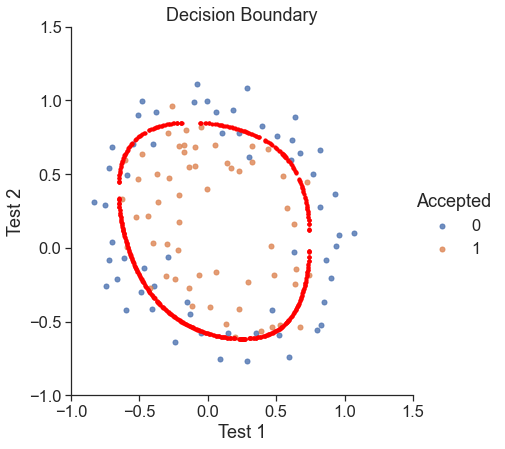

In [54]:
draw_boundary(power=6, l=1)#lambda=1

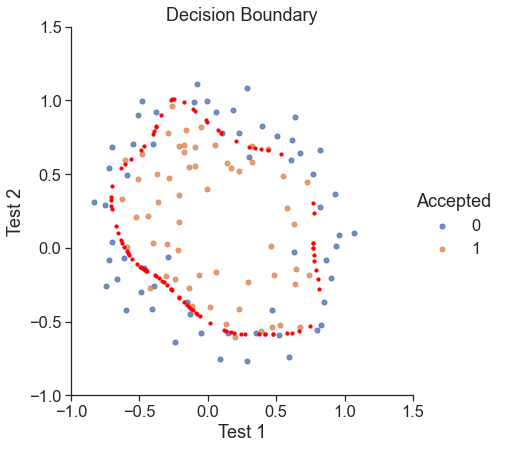

In [55]:
draw_boundary(power=6, l=0)#lambda=0

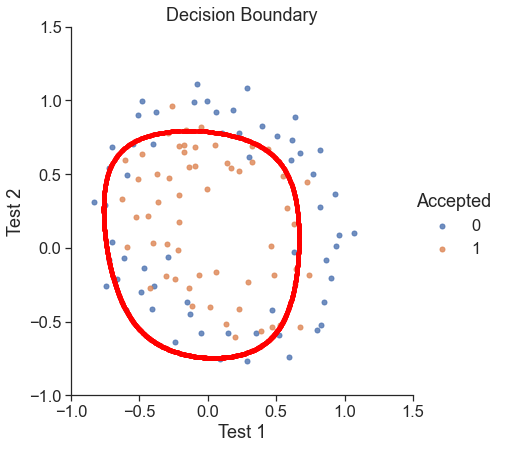

In [56]:
draw_boundary(power=6, l=10)#lambda=10

Can you tell the difference of the decision boundary with different lambda value?

Ans: When lambda is 0, it means that no penalty is added, which means that the number of theta will not be limited, so the predicted result has a high possibility of overfitting. As lambda gradually increases, it means that the penalty is increased, so each additional theta to fit will increase the cost. If lambda is too large, it will lead to underfitting, because the cost of the penalty term may exceed the cost of fitting the original loss function.